In [3]:
#Project for Quantitative Criticism Lab (UT Austin)
#Elias Sanchez
#DATASET USED : WORLD ATLAS OF LANGUAGE STRUCTURE (WALS) (WEBSITE: http://wals.info/)

import pandas as pd
import numpy as np
import csv
import math as m
import matplotlib.pyplot as plt

In [4]:
# Converts WALS coordinate data n to nearest n.25 or n.75 in order to search for classification
def rco(num):
    n = num-int(num)
    if n<=0.5:
        return (int(num)+ 0.25)
    else:
        return(int(num)+0.75)

In [5]:
#Auxilary binary search function
def binary(alist, item):
    if len(alist) == 0:
        return (-1)
    else:
        midpoint = len(alist)//2
        if alist[midpoint]==item:
          return (midpoint)
        else:
          if item<alist[midpoint]:
            return binary(alist[:midpoint],item)
          else:
            return binary(alist[midpoint+1:],item)

In [6]:
lang_df = pd.read_csv('language.csv', encoding = 'ISO-8859-1')

In [7]:
#koppen_1901-2010.tsv contains a file with latitude and longitudes that are close to .25 and .75 that gives the climate
koppen = np.genfromtxt("koppen_1901-2010.tsv", dtype=None, names=True)

In [8]:
#Translate longitude and latitude to Climate use binary search to look for num. coordinates
Clim = []
for i in range(0, len(lang_df)):
    s = 0
    if rco(lang_df['longitude'][i]) == -179.75:
        s = 0
    else:
        #binary search in first columns
        long = rco(lang_df['longitude'][i]) - 0.5
        s = binary(koppen['longitude'],long)
    
    if s==-1:
            Clim.append(str("NaN"))
            print(i)
    else:
        j=s
        lat = rco(lang_df['latitude'][i])
        lon = rco(lang_df['longitude'][i])
        
        while bool(lat == koppen['latitude'][j] and lon== koppen['longitude'][j])==False and bool(koppen['longitude'][j]< lon+1)==True:
            j=j+1
            if j== len(koppen['latitude'])-1:
                break
        
        if rco(lang_df['latitude'][i])== koppen['latitude'][j] and rco(lang_df['longitude'][i])==koppen['longitude'][j]:
            Clim.append(str(koppen['p1901_2010'][j]))
        else:
            Clim.append("NaN")
                                                                       
        

In [481]:
k = np.asarray(Clim)
k = k.tolist()

#get first letter of Koppen classification
for i in range(0, len(k)):
    if k[i]!='NaN':
        k[i] = k[i][2]

lang_df["Climate"] = k
# drop languages that where unale to be classified with Koppen
lang_df = lang_df[lang_df.Climate != 'NaN']

In [489]:
#Testing features on Phonology Area - Drop rows with null values
df1 = lang_df[lang_df['1A Consonant Inventories'].notnull() & lang_df['2A Vowel Quality Inventories'].notnull() & lang_df['3A Consonant-Vowel Ratio'].notnull() & lang_df['4A Voicing in Plosives and Fricatives'].notnull()& lang_df['13A Tone'].notnull() 
& lang_df['18A Absence of Common Consonants'].notnull() & lang_df['7A Glottalized Consonants'].notnull() & lang_df['8A Lateral Consonants'].notnull() & lang_df['9A The Velar Nasal'].notnull()& lang_df['10A Vowel Nasalization'].notnull()]
features = ['1A Consonant Inventories', '2A Vowel Quality Inventories', '3A Consonant-Vowel Ratio', '4A Voicing in Plosives and Fricatives', '13A Tone', '18A Absence of Common Consonants', '7A Glottalized Consonants', '8A Lateral Consonants', '9A The Velar Nasal', '10A Vowel Nasalization']
col = ['Name', '1A Consonant Inventories', '2A Vowel Quality Inventories', '3A Consonant-Vowel Ratio', '4A Voicing in Plosives and Fricatives', '13A Tone', '18A Absence of Common Consonants', '7A Glottalized Consonants', '8A Lateral_Consonants', '9A The Velar Nasal', '10A Vowel Nasalization', 'Climate']

#Target Vector
trg = df1['Climate']
trg = trg.tolist()

In [91]:
#Basic Ststistic for Output vector function Distribution of Climate languages for WALS data set (General)
def stats_out(Y):
    A=0
    B=0
    C=0
    D=0
    E=0
    for i in range(0,len(Y)):
        if Y[i] == 'A':
            A+=1
        elif Y[i] == 'B':
            B+=1
        elif Y[i] == 'C':
            C+=1
        elif Y[i] == 'D':
            D+=1
        elif Y[i] == 'E':
            E+=1
    print("A - Tropical: " + str(A) )
    print("B - Arid: " + str(B) )
    print("C - Temperate: " + str(C) )
    print("D - Cold: " + str(D) )
    print("E - Polar: " + str(E) )

#Distribution of Climate languages for WALS data set (General)

Cl= pd.Series.tolist(lang_df['Climate'])
stats_out(Cl)
print(len(Cl))
    

A - Tropical: 1036
B - Arid: 344
C - Temperate: 553
D - Cold: 234
E - Polar: 68
2235


In [14]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


In [1]:
#Pandas DF and Features to X-feature list and Y-vector (Climate)

def df_list(features, df):
    l = []
    for i in range(0, len(features)):
        l.append(pd.Series.tolist(pd.to_numeric(df[features[i]].str[0])))
    
    x = []
    
    for i in range(0,len(l[0])):
        x.append([])
        
    for i in range(0,len(l[0])):
        for k in range(0,len(features)):
            x[i].append(l[k][i])
    Y = pd.Series.tolist(df['Climate'])
    
    return (x,Y)
    

In [486]:
#Morphological data subset statistics
stats_out(trg)


A - Tropical: 45
B - Arid: 27
C - Temperate: 34
D - Cold: 18
E - Polar: 4


In [492]:
#run SVC - One-vs.-rest
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import LinearSVC

# I thought svm.SVC(kernel= "linear", decision_function_shape='ovr') vs OneVsRestClassifier(LinearSVC(random_state=0))
# where equivalent methods, but give different results

#Convert DF to lists for processing 
X,Y = a,b = df_list(features, df1)

#OHE for 
lb = preprocessing.LabelBinarizer()
lb.fit(Y)
y = lb.transform(Y)
le = preprocessing.LabelEncoder()
le.fit(Y)
ye = le.transform(Y)

#Method 1
sv_ovr = OneVsRestClassifier(LinearSVC(random_state=0, class_weight='balanced'))

#Method 2

svmm = OneVsRestClassifier(svm.SVC(kernel= "linear", class_weight='balanced'))

#reduced cv to 4 because in this subdataset there were only 4 samples for polar
scores_1 = cross_val_score(sv_ovr, X, y, cv=4)
scores_2 = cross_val_score(svmm, X, y, cv=4)
#I don't think svm.SVC allows for OHE, and only does label encoding
scores_3 = cross_val_score(svmm, X, Y, cv=4)

print("C-V scores, Method 1  - OHE : ")
print(scores_1)
print("C-V scores, Method 1  - non-OHE : ")
print(scores_2)
print("C-V scores, Method 2  - OHE :")
print(scores_3)

#95 percent Confidence Interval
print("Accuracy for C-V (95 CI) , Method 1  - OHE : %0.2f (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2))
print("Accuracy for C-V (95 CI), Method 2  - OHE : %0.2f (+/- %0.2f)" % (scores_2.mean(), scores_2.std() * 2))
print("Accuracy for C-V (95 CI), Method 2  - Label Encoding : %0.2f (+/- %0.2f)" % (scores_3.mean(), scores_3.std() * 2))


C-V scores, Method 1  - OHE : 
[ 0.0625  0.125   0.0625  0.1875]
C-V scores, Method 1  - non-OHE : 
[ 0.03125  0.       0.09375  0.1875 ]
C-V scores, Method 2  - OHE :
[ 0.17647059  0.21212121  0.12903226  0.3       ]
Accuracy for C-V (95 CI) , Method 1  - OHE : 0.11 (+/- 0.10)
Accuracy for C-V (95 CI), Method 2  - OHE : 0.08 (+/- 0.14)
Accuracy for C-V (95 CI), Method 2  - Label Encoding : 0.20 (+/- 0.13)


In [494]:
#confusion matrix for SVC for One vs Rest Classifier
y_actu = pd.Series(Y, name='Actual')
y_pred = pd.Series(pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,A,B,C,D
Actual,,,,
A,12,1,0,1
B,4,0,1,0
C,6,1,1,0
D,3,0,2,0


In [113]:
#Normalized confusion matrix
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

Predicted,A,B,C,D,E
Actual,,,,,
A,0.955556,0.037037,0.029412,0.000000,0.0
B,0.266667,0.370370,0.147059,0.000000,0.0
C,0.155556,0.074074,0.647059,0.166667,0.0
D,0.133333,0.000000,0.117647,0.444444,0.0
E,0.000000,0.000000,0.000000,0.000000,1.0


In [114]:
#Simple accuracy measurement
c=0
for i in range(0, len(Y)):
    if Y[i]== pred[i]:
        c=c+1
c/len(Y)
    

0.6796875

In [115]:
#Cohen's Kappa Score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_actu, y_pred)

0.55033844572016111

In [ ]:
#auxilary function for ranking each Linear SVM
def feat_ovr_imp(coeff):
    

Coefficients for One vs Rest SVM:
[[-0.13162049  0.36661985  0.01518856 -0.03857059  0.12495317  0.46412589
  -0.01263335 -0.20098693  0.05168871 -0.12549144]
 [ 0.08672288 -0.0996722   0.02064281 -0.05925609  0.12408313 -0.09254101
  -0.0292931  -0.08166603  0.01315186 -0.02376793]
 [-0.01804417 -0.26176664 -0.11028506  0.1353091  -0.14678621 -0.26451282
   0.07335827  0.1286131  -0.09413336 -0.10237569]
 [ 0.02270375  0.01372145  0.0358003  -0.0142202  -0.12344039 -0.62060102
   0.02316542  0.06346887  0.04064786  0.16777648]
 [ 0.37259768 -0.10435963  0.31375729 -0.31869476 -0.18944206 -0.38890577
  -0.67561593  0.86678041 -1.05686296 -0.36504276]]

 Feature ranking:
1. feature 6 - 18A Absence of Common Consonants (0.328852)
2. feature 8 - 8A Lateral_Consonants (0.176589)
3. feature 9 - 9A The Velar Nasal (0.154913)
4. feature 2 - 2A Vowel Quality Inventories (0.070252)
5. feature 7 - 7A Glottalized Consonants (0.065027)
6. feature 10 - 10A Vowel Nasalization (0.060382)
7. feature 5

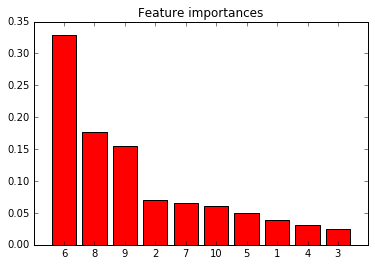

In [136]:
#Feature Importance - for each list j, represents the jth feature vs Rest linear SVM's coefficient

features_names = col[1:11]
sv_ovr.fit(X, y)
coef = sv_ovr.coef_


print("Coefficients for One vs Rest SVM:")
print(coef)
a = np.absolute(coef)
b = np.sum(a, axis=0)
b = np.square(b)
s = sum(b)
feat = np.true_divide(b,s)
feat = np.asarray(feat)

ind = np.argsort(feat)[::-1]

print("\n Feature ranking:")

X = np.asarray(X)

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, ind[f] + 1, features_names[ind[f]], feat[ind[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feat[ind],
       color="r", align="center")
plt.xticks(range(X.shape[1]), ind+1)
plt.xlim([-1, X.shape[1]])
plt.show()







In [125]:
#Random Forest Multi-Classification with One Hot Encoding for Climate Vector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split


In [180]:
train_x, test_x, train_y, test_y = train_test_split(X,y)

In [262]:
rfc = RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [252]:
trained_model = rfc.fit(train_x, train_y)
trained_model

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [253]:
predictions = trained_model.predict(test_x)
predictions = lb.inverse_transform(predictions)
print("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print("Test Accuracy  :: ", accuracy_score(test_y, predictions))

Train Accuracy ::  0.791666666667
Test Accuracy  ::  0.40625


In [258]:
#Cross validation for RF 95% Confidence Interval
scores = cross_val_score(rfc, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.38461538  0.23076923  0.15384615  0.08        0.36      ]
Accuracy: 0.24 (+/- 0.23)


In [255]:
#Confusion matrix for tested sample
#predictions = lb.inverse_transform(predictions)
y_actu = pd.Series(test_y, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,A,B,C,D
Actual,,,,
A,12,1,0,1
B,4,0,1,0
C,6,1,1,0
D,3,0,2,0


Feature ranking:
1. feature 3 - 3A Consonant-Vowel Ratio (0.143270)
2. feature 1 - 1A Consonant Inventories (0.131704)
3. feature 4 - 4A Voicing in Plosives and Fricatives (0.131554)
4. feature 8 - 8A Lateral_Consonants (0.115397)
5. feature 9 - 9A The Velar Nasal (0.108166)
6. feature 7 - 7A Glottalized Consonants (0.103478)
7. feature 2 - 2A Vowel Quality Inventories (0.095154)
8. feature 5 - 13A Tone (0.082090)
9. feature 10 - 10A Vowel Nasalization (0.054284)
10. feature 6 - 18A Absence of Common Consonants (0.034902)


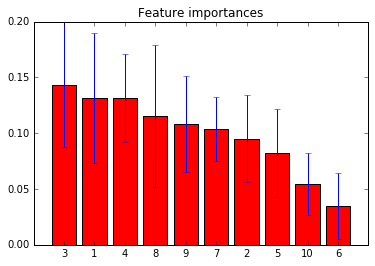

In [259]:
#Feature Importance
importances = trained_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in trained_model.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

features_names = col[1:11]


# Print the feature ranking
print("Feature ranking:")

X = np.asarray(X)


for f in range(0,X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f+1 , indices[f] + 1, features_names[indices[f]], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), (indices+1))
plt.xlim([-1, X.shape[1]])
plt.show()

Extra Tree Classifier:
[ 0.42307692  0.23076923  0.19230769  0.12        0.36      ] 

Accuracy: 0.27 (+/- 0.22)

Feature ranking:
1. feature 0 - 1A Consonant Inventories (0.155290)
2. feature 2 - 3A Consonant-Vowel Ratio (0.146374)
3. feature 3 - 4A Voicing in Plosives and Fricatives (0.123380)
4. feature 7 - 8A Lateral Consonants (0.108937)
5. feature 1 - 2A Vowel Quality Inventories (0.108102)
6. feature 4 - 13A Tone (0.098412)
7. feature 6 - 7A Glottalized Consonants (0.090548)
8. feature 8 - 9A The Velar Nasal (0.082299)
9. feature 5 - 18A Absence of Common Consonants (0.043959)
10. feature 9 - 10A Vowel Nasalization (0.042700)


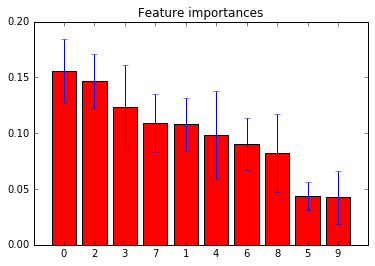

In [309]:
#Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(random_state=0)

forest.fit(X, y)

etcv = cross_val_score(forest, X, y, cv=5)
print("Extra Tree Classifier:")

print(etcv,"\n")

print("Accuracy: %0.2f (+/- %0.2f)\n" % (etcv.mean(), etcv.std() * 2))

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f]+1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [474]:
#Linear SVM Feature Importance for binary classification Function
def svm_feat_imp(clas, xi, yi, feat_names):
    clas.fit(xi,yi)
    coef = clas.coef_[0]

    c = np.absolute(coef)
    s = sum(c)
    
    feat_c = np.true_divide(c,s)
    feat_c = np.asarray(feat_c)
    
    ind = np.argsort(feat_c)[::-1]
        
    print("Feature ranking:")
    
    xi = np.asarray(xi)
    
    print(xi.shape)
    print(len(feat_names))
    print(len(feat_c))
    
    for f in range(xi.shape[1]):
        print("%d. feature %d - %s (%f)" % (f + 1, ind[f], feat_names[ind[f]], feat_c[ind[f]]))
    
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(xi.shape[1]), feat_c[ind], color="r", align="center")
    plt.xticks(range(xi.shape[1]), ind+1)
    plt.xlim([-1, xi.shape[1]])
    plt.show()
    
    
#RF Feature Importance for binary classification Function
def RFC_feat_imp(trained_model, feat, inp):
    importances = trained_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in trained_model.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    inp = np.asarray(inp)

    for f in range(inp.shape[1]):
        print("%d. feature %d - %s (%f)" % (f+1, indices[f], feat[indices[f]], importances[indices[f]]))
    
    print(indices)
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(inp.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(inp.shape[1]), indices)
    plt.xlim([-1, inp.shape[1]])
    plt.show()
    

    
    

In [372]:
subsets = [['A','B'],['A','C'],['A','D'],['A','E'],['B','C'],['B','D'],['B','E'],['C','D'],['C','E'],['D','E']]

In [439]:
#Phonological - Binary Classifications
#Binary classification for Tropical vs Arid
b_df1 = df1[ (df1['Climate']=='A') | (df1['Climate'] =='B')]

def Clim_let(lst):
    
    dic ={'A':'TROPICAL','B':'ARID', 'C':'TEMPERATE', 'D': 'COLD', 'E':'POLAR'}
    print(dic.get(lst[0]) + " AND " + dic.get(lst[1]) + " - BINARY CLASSIFICATION")
    
    

#Function that makes binary classification between each individual class for RF and linear SVM with CV and Feature importance for each

#Get each individual sample from the data set and put it into lists
def binary_clas(df, ft, clim_subs):
    
    x_lst = []
    y_lst = []
    for i in range(0, len(subsets)):
        x = []
        y = []
        b_df =  df1[(df1['Climate'] == str(clim_subs[i][0])) | (df1['Climate'] == str(clim_subs[i][1]))]
        x,y = df_list(features, b_df)
        
        x_lst.append(x)
        y_lst.append(y)
    
    #Initialize classifiers
    rf = RandomForestClassifier(class_weight = 'balanced')
    sv = svm.SVC(kernel= "linear", class_weight = 'balanced')
    et = ExtraTreesClassifier(random_state=0, class_weight = 'balanced')

    for j in range(0,len(y_lst)):
        
        trained_model = rf.fit(x_lst[j],y_lst[j])
        cvsv = cross_val_score(sv, x_lst[j], y_lst[j], cv=4)
        
        t_m = et.fit(x_lst[j],y_lst[j])
        
        Clim_let(clim_subs[j])
        
        print("Linear SVM Classification C-V:")
        print(cvs)
        print("Accuracy: %0.2f (+/- %0.2f)" % (cvsv.mean(), cvsv.std() * 2))
        print("Linear SVM Feature Importance:")
        svm_feat_imp(sv, x_lst[j], y_lst[j], ft)
        
        cvrf = cross_val_score(rf, x_lst[j], y_lst[j], cv=5)
        print()
        
        print("Random Forest Classification:")
        
        print(cvrf)
        print("Accuracy: %0.2f (+/- %0.2f)" % (cvrf.mean(), cvrf.std() * 2))
        RFC_feat_imp(trained_model, ft, x_lst[j])
        print()
        
        print("Extra Trees Classification:")
        
        etcv = cross_val_score(et, x_lst[j], y_lst[j], cv=5)
        print(etcv)
        print("Accuracy: %0.2f (+/- %0.2f)" % (etcv.mean(), etcv.std() * 2))
        RFC_feat_imp(t_m, ft, x_lst[j])
        
        
        
    
    

TROPICAL AND ARID - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.50 (+/- 0.17)
Linear SVM Feature Importance:
Feature ranking:
1. feature 7 - 8A Lateral Consonants (0.202610)
2. feature 1 - 2A Vowel Quality Inventories (0.202595)
3. feature 0 - 1A Consonant Inventories (0.153553)
4. feature 5 - 18A Absence of Common Consonants (0.149334)
5. feature 8 - 9A The Velar Nasal (0.084038)
6. feature 4 - 13A Tone (0.055749)
7. feature 2 - 3A Consonant-Vowel Ratio (0.055292)
8. feature 9 - 10A Vowel Nasalization (0.055138)
9. feature 3 - 4A Voicing in Plosives and Fricatives (0.027739)
10. feature 6 - 7A Glottalized Consonants (0.013952)


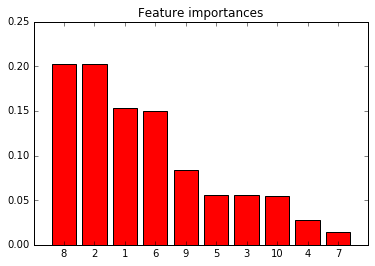


Random Forest Classification:
[ 0.73333333  0.4         0.35714286  0.78571429  0.78571429]
Accuracy: 0.61 (+/- 0.38)
Feature ranking:
1. feature 4 - 13A Tone (0.175949)
2. feature 0 - 1A Consonant Inventories (0.162290)
3. feature 2 - 3A Consonant-Vowel Ratio (0.144816)
4. feature 7 - 8A Lateral Consonants (0.123092)
5. feature 3 - 4A Voicing in Plosives and Fricatives (0.106705)
6. feature 1 - 2A Vowel Quality Inventories (0.106291)
7. feature 6 - 7A Glottalized Consonants (0.094363)
8. feature 8 - 9A The Velar Nasal (0.050705)
9. feature 9 - 10A Vowel Nasalization (0.019706)
10. feature 5 - 18A Absence of Common Consonants (0.016085)
[4 0 2 7 3 1 6 8 9 5]


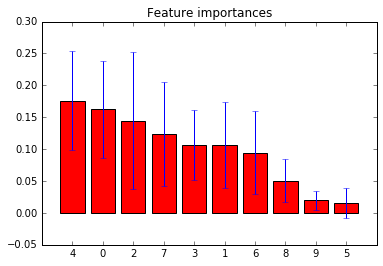


Extra Trees Classification:
[ 0.8         0.46666667  0.42857143  0.71428571  0.78571429]
Accuracy: 0.64 (+/- 0.32)
Feature ranking:
1. feature 0 - 1A Consonant Inventories (0.174846)
2. feature 4 - 13A Tone (0.145533)
3. feature 7 - 8A Lateral Consonants (0.138631)
4. feature 2 - 3A Consonant-Vowel Ratio (0.125747)
5. feature 3 - 4A Voicing in Plosives and Fricatives (0.115254)
6. feature 6 - 7A Glottalized Consonants (0.073094)
7. feature 1 - 2A Vowel Quality Inventories (0.072606)
8. feature 8 - 9A The Velar Nasal (0.064702)
9. feature 9 - 10A Vowel Nasalization (0.049945)
10. feature 5 - 18A Absence of Common Consonants (0.039643)
[0 4 7 2 3 6 1 8 9 5]


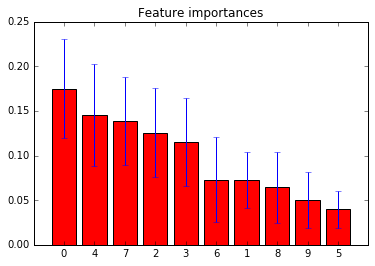

TROPICAL AND TEMPERATE - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.56 (+/- 0.27)
Linear SVM Feature Importance:
Feature ranking:
1. feature 1 - 2A Vowel Quality Inventories (0.187407)
2. feature 5 - 18A Absence of Common Consonants (0.178287)
3. feature 7 - 8A Lateral Consonants (0.168859)
4. feature 4 - 13A Tone (0.145994)
5. feature 3 - 4A Voicing in Plosives and Fricatives (0.110303)
6. feature 8 - 9A The Velar Nasal (0.064671)
7. feature 9 - 10A Vowel Nasalization (0.064605)
8. feature 2 - 3A Consonant-Vowel Ratio (0.064559)
9. feature 6 - 7A Glottalized Consonants (0.012170)
10. feature 0 - 1A Consonant Inventories (0.003145)


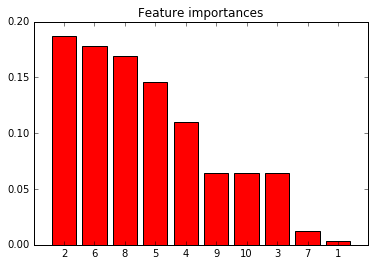


Random Forest Classification:
[ 0.8125      0.6875      0.6875      0.5         0.73333333]
Accuracy: 0.68 (+/- 0.21)
Feature ranking:
1. feature 7 - 8A Lateral Consonants (0.138190)
2. feature 2 - 3A Consonant-Vowel Ratio (0.130083)
3. feature 6 - 7A Glottalized Consonants (0.112836)
4. feature 8 - 9A The Velar Nasal (0.106066)
5. feature 1 - 2A Vowel Quality Inventories (0.104991)
6. feature 5 - 18A Absence of Common Consonants (0.094900)
7. feature 0 - 1A Consonant Inventories (0.092031)
8. feature 4 - 13A Tone (0.087841)
9. feature 3 - 4A Voicing in Plosives and Fricatives (0.085347)
10. feature 9 - 10A Vowel Nasalization (0.047715)
[7 2 6 8 1 5 0 4 3 9]


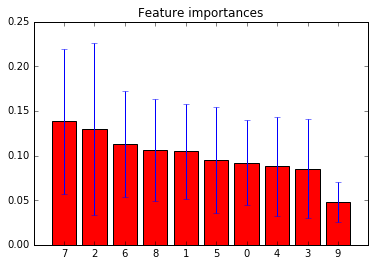


Extra Trees Classification:
[ 0.6875      0.75        0.6875      0.5625      0.73333333]
Accuracy: 0.68 (+/- 0.13)
Feature ranking:
1. feature 0 - 1A Consonant Inventories (0.149228)
2. feature 4 - 13A Tone (0.136267)
3. feature 7 - 8A Lateral Consonants (0.122144)
4. feature 1 - 2A Vowel Quality Inventories (0.107632)
5. feature 2 - 3A Consonant-Vowel Ratio (0.096768)
6. feature 3 - 4A Voicing in Plosives and Fricatives (0.096751)
7. feature 5 - 18A Absence of Common Consonants (0.092170)
8. feature 8 - 9A The Velar Nasal (0.091225)
9. feature 6 - 7A Glottalized Consonants (0.077615)
10. feature 9 - 10A Vowel Nasalization (0.030199)
[0 4 7 1 2 3 5 8 6 9]


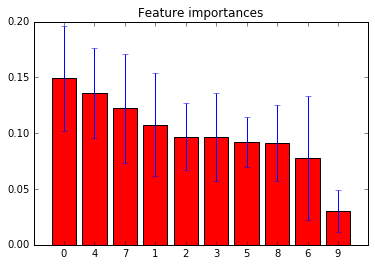

TROPICAL AND COLD - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.75 (+/- 0.18)
Linear SVM Feature Importance:
Feature ranking:
1. feature 5 - 18A Absence of Common Consonants (0.310485)
2. feature 7 - 8A Lateral Consonants (0.202913)
3. feature 9 - 10A Vowel Nasalization (0.107094)
4. feature 2 - 3A Consonant-Vowel Ratio (0.103709)
5. feature 1 - 2A Vowel Quality Inventories (0.091364)
6. feature 3 - 4A Voicing in Plosives and Fricatives (0.069779)
7. feature 4 - 13A Tone (0.054266)
8. feature 6 - 7A Glottalized Consonants (0.052616)
9. feature 8 - 9A The Velar Nasal (0.007706)
10. feature 0 - 1A Consonant Inventories (0.000067)


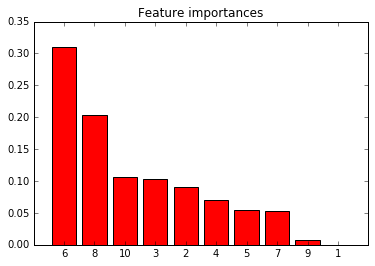


Random Forest Classification:
[ 0.84615385  0.46153846  0.76923077  0.75        0.75      ]
Accuracy: 0.72 (+/- 0.26)
Feature ranking:
1. feature 0 - 1A Consonant Inventories (0.175832)
2. feature 7 - 8A Lateral Consonants (0.174480)
3. feature 2 - 3A Consonant-Vowel Ratio (0.136246)
4. feature 6 - 7A Glottalized Consonants (0.097438)
5. feature 3 - 4A Voicing in Plosives and Fricatives (0.093637)
6. feature 5 - 18A Absence of Common Consonants (0.089478)
7. feature 1 - 2A Vowel Quality Inventories (0.087506)
8. feature 4 - 13A Tone (0.070452)
9. feature 9 - 10A Vowel Nasalization (0.047114)
10. feature 8 - 9A The Velar Nasal (0.027818)
[0 7 2 6 3 5 1 4 9 8]


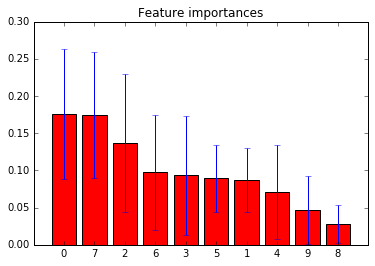


Extra Trees Classification:
[ 0.69230769  0.38461538  0.84615385  0.58333333  1.        ]
Accuracy: 0.70 (+/- 0.42)
Feature ranking:
1. feature 7 - 8A Lateral Consonants (0.163390)
2. feature 3 - 4A Voicing in Plosives and Fricatives (0.142615)
3. feature 0 - 1A Consonant Inventories (0.118129)
4. feature 2 - 3A Consonant-Vowel Ratio (0.107512)
5. feature 4 - 13A Tone (0.103999)
6. feature 1 - 2A Vowel Quality Inventories (0.100224)
7. feature 6 - 7A Glottalized Consonants (0.084927)
8. feature 5 - 18A Absence of Common Consonants (0.072010)
9. feature 8 - 9A The Velar Nasal (0.060940)
10. feature 9 - 10A Vowel Nasalization (0.046254)
[7 3 0 2 4 1 6 5 8 9]


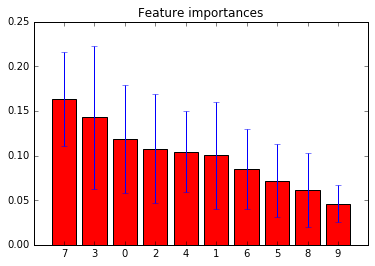

TROPICAL AND POLAR - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 1.00 (+/- 0.00)
Linear SVM Feature Importance:
Feature ranking:
1. feature 5 - 18A Absence of Common Consonants (0.200689)
2. feature 2 - 3A Consonant-Vowel Ratio (0.170005)
3. feature 8 - 9A The Velar Nasal (0.154387)
4. feature 0 - 1A Consonant Inventories (0.102835)
5. feature 6 - 7A Glottalized Consonants (0.102114)
6. feature 7 - 8A Lateral Consonants (0.099683)
7. feature 1 - 2A Vowel Quality Inventories (0.093336)
8. feature 4 - 13A Tone (0.041573)
9. feature 3 - 4A Voicing in Plosives and Fricatives (0.035377)
10. feature 9 - 10A Vowel Nasalization (0.000000)


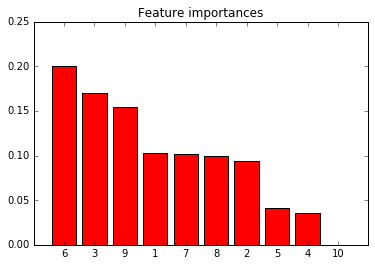

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)



Random Forest Classification:
[ 0.9  0.8  0.9  0.9  1. ]
Accuracy: 0.90 (+/- 0.13)
Feature ranking:
1. feature 2 - 3A Consonant-Vowel Ratio (0.322308)
2. feature 7 - 8A Lateral Consonants (0.236934)
3. feature 1 - 2A Vowel Quality Inventories (0.129734)
4. feature 0 - 1A Consonant Inventories (0.106751)
5. feature 5 - 18A Absence of Common Consonants (0.072850)
6. feature 8 - 9A The Velar Nasal (0.046733)
7. feature 3 - 4A Voicing in Plosives and Fricatives (0.042009)
8. feature 4 - 13A Tone (0.036471)
9. feature 9 - 10A Vowel Nasalization (0.006211)
10. feature 6 - 7A Glottalized Consonants (0.000000)
[2 7 1 0 5 8 3 4 9 6]


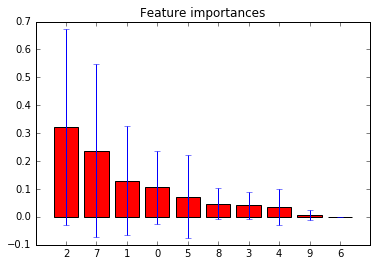


Extra Trees Classification:
[ 0.9         1.          0.9         0.9         0.88888889]
Accuracy: 0.92 (+/- 0.08)
Feature ranking:
1. feature 2 - 3A Consonant-Vowel Ratio (0.228797)
2. feature 1 - 2A Vowel Quality Inventories (0.164447)
3. feature 7 - 8A Lateral Consonants (0.154381)
4. feature 8 - 9A The Velar Nasal (0.132471)
5. feature 0 - 1A Consonant Inventories (0.089399)
6. feature 9 - 10A Vowel Nasalization (0.067107)
7. feature 5 - 18A Absence of Common Consonants (0.053787)
8. feature 6 - 7A Glottalized Consonants (0.049312)
9. feature 4 - 13A Tone (0.039953)
10. feature 3 - 4A Voicing in Plosives and Fricatives (0.020345)
[2 1 7 8 0 9 5 6 4 3]


/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


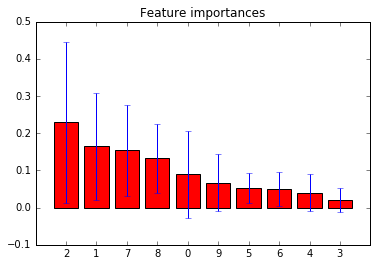

ARID AND TEMPERATE - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.41 (+/- 0.22)
Linear SVM Feature Importance:
Feature ranking:
1. feature 4 - 13A Tone (0.269063)
2. feature 3 - 4A Voicing in Plosives and Fricatives (0.170256)
3. feature 5 - 18A Absence of Common Consonants (0.137798)
4. feature 6 - 7A Glottalized Consonants (0.120099)
5. feature 8 - 9A The Velar Nasal (0.089440)
6. feature 7 - 8A Lateral Consonants (0.071377)
7. feature 0 - 1A Consonant Inventories (0.053892)
8. feature 1 - 2A Vowel Quality Inventories (0.042781)
9. feature 2 - 3A Consonant-Vowel Ratio (0.030202)
10. feature 9 - 10A Vowel Nasalization (0.015091)


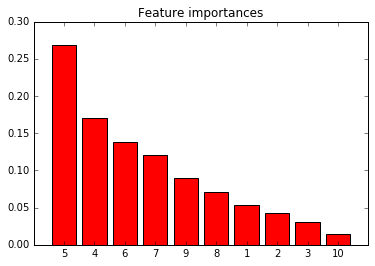


Random Forest Classification:
[ 0.61538462  0.15384615  0.5         0.33333333  0.54545455]
Accuracy: 0.43 (+/- 0.33)
Feature ranking:
1. feature 2 - 3A Consonant-Vowel Ratio (0.182072)
2. feature 3 - 4A Voicing in Plosives and Fricatives (0.125204)
3. feature 8 - 9A The Velar Nasal (0.123763)
4. feature 0 - 1A Consonant Inventories (0.117471)
5. feature 7 - 8A Lateral Consonants (0.091046)
6. feature 1 - 2A Vowel Quality Inventories (0.090500)
7. feature 6 - 7A Glottalized Consonants (0.084143)
8. feature 4 - 13A Tone (0.079421)
9. feature 9 - 10A Vowel Nasalization (0.076579)
10. feature 5 - 18A Absence of Common Consonants (0.029802)
[2 3 8 0 7 1 6 4 9 5]


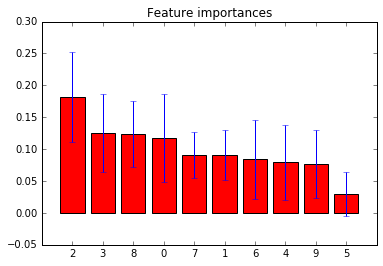


Extra Trees Classification:
[ 0.46153846  0.38461538  0.25        0.25        0.36363636]
Accuracy: 0.34 (+/- 0.16)
Feature ranking:
1. feature 2 - 3A Consonant-Vowel Ratio (0.146881)
2. feature 8 - 9A The Velar Nasal (0.131429)
3. feature 3 - 4A Voicing in Plosives and Fricatives (0.129945)
4. feature 1 - 2A Vowel Quality Inventories (0.110338)
5. feature 9 - 10A Vowel Nasalization (0.099014)
6. feature 0 - 1A Consonant Inventories (0.098544)
7. feature 7 - 8A Lateral Consonants (0.097665)
8. feature 6 - 7A Glottalized Consonants (0.092264)
9. feature 4 - 13A Tone (0.064553)
10. feature 5 - 18A Absence of Common Consonants (0.029367)
[2 8 3 1 9 0 7 6 4 5]


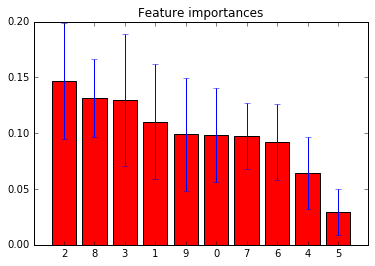

ARID AND COLD - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.53 (+/- 0.16)
Linear SVM Feature Importance:
Feature ranking:
1. feature 4 - 13A Tone (0.269928)
2. feature 9 - 10A Vowel Nasalization (0.207609)
3. feature 5 - 18A Absence of Common Consonants (0.183648)
4. feature 7 - 8A Lateral Consonants (0.126902)
5. feature 2 - 3A Consonant-Vowel Ratio (0.072727)
6. feature 6 - 7A Glottalized Consonants (0.050585)
7. feature 1 - 2A Vowel Quality Inventories (0.049639)
8. feature 8 - 9A The Velar Nasal (0.036436)
9. feature 3 - 4A Voicing in Plosives and Fricatives (0.001495)
10. feature 0 - 1A Consonant Inventories (0.001031)


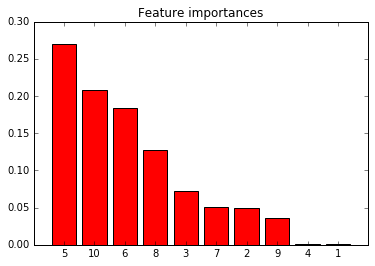


Random Forest Classification:
[ 0.7         0.4         0.66666667  0.5         0.5       ]
Accuracy: 0.55 (+/- 0.23)
Feature ranking:
1. feature 2 - 3A Consonant-Vowel Ratio (0.163198)
2. feature 3 - 4A Voicing in Plosives and Fricatives (0.151732)
3. feature 0 - 1A Consonant Inventories (0.151398)
4. feature 4 - 13A Tone (0.147844)
5. feature 6 - 7A Glottalized Consonants (0.112190)
6. feature 1 - 2A Vowel Quality Inventories (0.087273)
7. feature 7 - 8A Lateral Consonants (0.061079)
8. feature 8 - 9A The Velar Nasal (0.051067)
9. feature 9 - 10A Vowel Nasalization (0.050973)
10. feature 5 - 18A Absence of Common Consonants (0.023246)
[2 3 0 4 6 1 7 8 9 5]


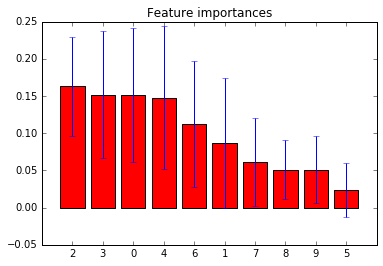


Extra Trees Classification:
[ 0.6         0.6         0.77777778  0.625       0.375     ]
Accuracy: 0.60 (+/- 0.26)
Feature ranking:
1. feature 0 - 1A Consonant Inventories (0.203390)
2. feature 2 - 3A Consonant-Vowel Ratio (0.169298)
3. feature 4 - 13A Tone (0.124348)
4. feature 3 - 4A Voicing in Plosives and Fricatives (0.110875)
5. feature 6 - 7A Glottalized Consonants (0.096678)
6. feature 7 - 8A Lateral Consonants (0.078458)
7. feature 1 - 2A Vowel Quality Inventories (0.069662)
8. feature 8 - 9A The Velar Nasal (0.067203)
9. feature 9 - 10A Vowel Nasalization (0.052497)
10. feature 5 - 18A Absence of Common Consonants (0.027591)
[0 2 4 3 6 7 1 8 9 5]


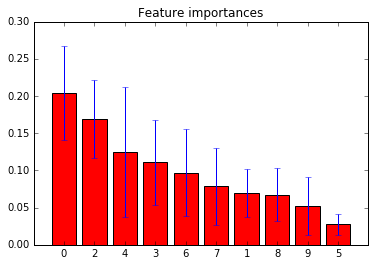

ARID AND POLAR - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.81 (+/- 0.41)
Linear SVM Feature Importance:
Feature ranking:
1. feature 8 - 9A The Velar Nasal (0.210441)
2. feature 7 - 8A Lateral Consonants (0.172917)
3. feature 4 - 13A Tone (0.166176)
4. feature 9 - 10A Vowel Nasalization (0.144348)
5. feature 0 - 1A Consonant Inventories (0.141102)
6. feature 5 - 18A Absence of Common Consonants (0.105240)
7. feature 2 - 3A Consonant-Vowel Ratio (0.042203)
8. feature 6 - 7A Glottalized Consonants (0.011827)
9. feature 1 - 2A Vowel Quality Inventories (0.003868)
10. feature 3 - 4A Voicing in Plosives and Fricatives (0.001878)


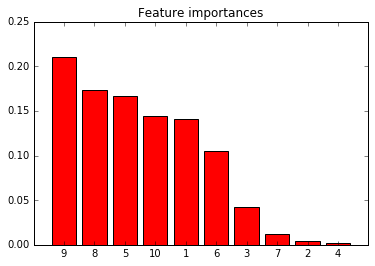

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)



Random Forest Classification:
[ 0.85714286  0.85714286  0.83333333  0.83333333  1.        ]
Accuracy: 0.88 (+/- 0.13)
Feature ranking:
1. feature 2 - 3A Consonant-Vowel Ratio (0.265085)
2. feature 8 - 9A The Velar Nasal (0.180322)
3. feature 0 - 1A Consonant Inventories (0.114073)
4. feature 3 - 4A Voicing in Plosives and Fricatives (0.098702)
5. feature 4 - 13A Tone (0.096149)
6. feature 5 - 18A Absence of Common Consonants (0.084610)
7. feature 1 - 2A Vowel Quality Inventories (0.056482)
8. feature 9 - 10A Vowel Nasalization (0.046830)
9. feature 7 - 8A Lateral Consonants (0.039240)
10. feature 6 - 7A Glottalized Consonants (0.018509)
[2 8 0 3 4 5 1 9 7 6]


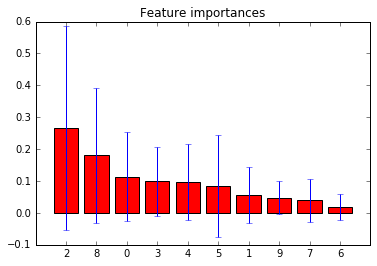


Extra Trees Classification:
[ 0.85714286  0.71428571  0.83333333  0.83333333  1.        ]
Accuracy: 0.85 (+/- 0.18)
Feature ranking:
1. feature 8 - 9A The Velar Nasal (0.264987)
2. feature 7 - 8A Lateral Consonants (0.164016)
3. feature 2 - 3A Consonant-Vowel Ratio (0.139865)
4. feature 4 - 13A Tone (0.090515)
5. feature 0 - 1A Consonant Inventories (0.083918)
6. feature 5 - 18A Absence of Common Consonants (0.083032)
7. feature 9 - 10A Vowel Nasalization (0.076541)
8. feature 1 - 2A Vowel Quality Inventories (0.047548)
9. feature 3 - 4A Voicing in Plosives and Fricatives (0.043126)
10. feature 6 - 7A Glottalized Consonants (0.006452)
[8 7 2 4 0 5 9 1 3 6]


/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


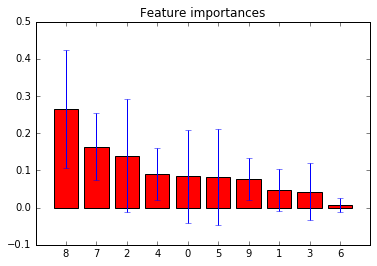

TEMPERATE AND COLD - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.31 (+/- 0.23)
Linear SVM Feature Importance:
Feature ranking:
1. feature 9 - 10A Vowel Nasalization (0.269151)
2. feature 8 - 9A The Velar Nasal (0.191441)
3. feature 5 - 18A Absence of Common Consonants (0.181924)
4. feature 1 - 2A Vowel Quality Inventories (0.092879)
5. feature 3 - 4A Voicing in Plosives and Fricatives (0.080682)
6. feature 2 - 3A Consonant-Vowel Ratio (0.069099)
7. feature 4 - 13A Tone (0.057430)
8. feature 6 - 7A Glottalized Consonants (0.023346)
9. feature 0 - 1A Consonant Inventories (0.023197)
10. feature 7 - 8A Lateral Consonants (0.010851)


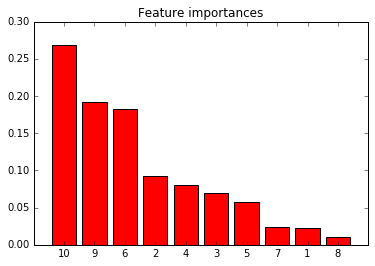


Random Forest Classification:
[ 0.54545455  0.45454545  0.36363636  0.4         0.33333333]
Accuracy: 0.42 (+/- 0.15)
Feature ranking:
1. feature 0 - 1A Consonant Inventories (0.148339)
2. feature 7 - 8A Lateral Consonants (0.146132)
3. feature 2 - 3A Consonant-Vowel Ratio (0.144302)
4. feature 3 - 4A Voicing in Plosives and Fricatives (0.142099)
5. feature 8 - 9A The Velar Nasal (0.110819)
6. feature 1 - 2A Vowel Quality Inventories (0.101109)
7. feature 6 - 7A Glottalized Consonants (0.087701)
8. feature 4 - 13A Tone (0.062784)
9. feature 9 - 10A Vowel Nasalization (0.056715)
10. feature 5 - 18A Absence of Common Consonants (0.000000)
[0 7 2 3 8 1 6 4 9 5]


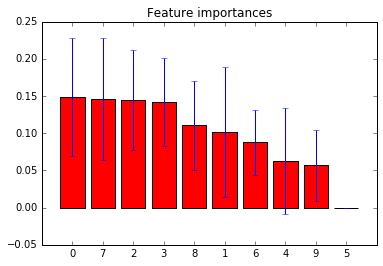


Extra Trees Classification:
[ 0.63636364  0.54545455  0.45454545  0.4         0.33333333]
Accuracy: 0.47 (+/- 0.21)
Feature ranking:
1. feature 2 - 3A Consonant-Vowel Ratio (0.150021)
2. feature 3 - 4A Voicing in Plosives and Fricatives (0.145817)
3. feature 7 - 8A Lateral Consonants (0.144181)
4. feature 1 - 2A Vowel Quality Inventories (0.140129)
5. feature 0 - 1A Consonant Inventories (0.125726)
6. feature 8 - 9A The Velar Nasal (0.088999)
7. feature 4 - 13A Tone (0.082771)
8. feature 6 - 7A Glottalized Consonants (0.070183)
9. feature 9 - 10A Vowel Nasalization (0.035438)
10. feature 5 - 18A Absence of Common Consonants (0.016735)
[2 3 7 1 0 8 4 6 9 5]


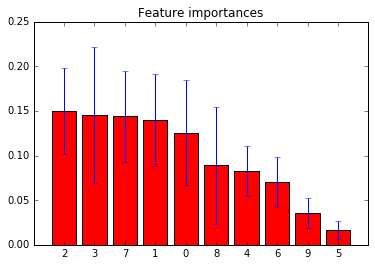

TEMPERATE AND POLAR - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.84 (+/- 0.11)
Linear SVM Feature Importance:
Feature ranking:
1. feature 8 - 9A The Velar Nasal (0.184697)
2. feature 6 - 7A Glottalized Consonants (0.172725)
3. feature 7 - 8A Lateral Consonants (0.163215)
4. feature 4 - 13A Tone (0.121880)
5. feature 2 - 3A Consonant-Vowel Ratio (0.110880)
6. feature 9 - 10A Vowel Nasalization (0.104932)
7. feature 0 - 1A Consonant Inventories (0.080019)
8. feature 3 - 4A Voicing in Plosives and Fricatives (0.055402)
9. feature 1 - 2A Vowel Quality Inventories (0.006250)
10. feature 5 - 18A Absence of Common Consonants (0.000000)


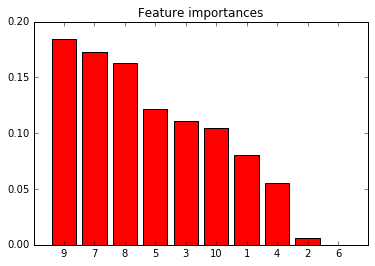

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)



Random Forest Classification:
[ 0.875  0.875  0.875  0.875  1.   ]
Accuracy: 0.90 (+/- 0.10)
Feature ranking:
1. feature 0 - 1A Consonant Inventories (0.171549)
2. feature 3 - 4A Voicing in Plosives and Fricatives (0.148948)
3. feature 8 - 9A The Velar Nasal (0.127630)
4. feature 2 - 3A Consonant-Vowel Ratio (0.124141)
5. feature 1 - 2A Vowel Quality Inventories (0.123851)
6. feature 7 - 8A Lateral Consonants (0.075244)
7. feature 4 - 13A Tone (0.055856)
8. feature 9 - 10A Vowel Nasalization (0.039001)
9. feature 6 - 7A Glottalized Consonants (0.032413)
10. feature 5 - 18A Absence of Common Consonants (0.001365)
[0 3 8 2 1 7 4 9 6 5]


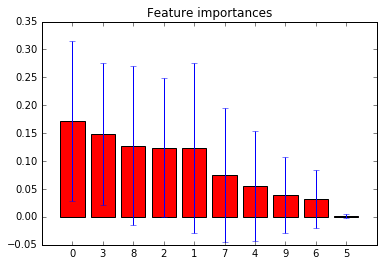


Extra Trees Classification:
[ 0.875  0.875  0.875  0.875  1.   ]
Accuracy: 0.90 (+/- 0.10)
Feature ranking:
1. feature 8 - 9A The Velar Nasal (0.209537)
2. feature 2 - 3A Consonant-Vowel Ratio (0.206901)
3. feature 1 - 2A Vowel Quality Inventories (0.162058)
4. feature 7 - 8A Lateral Consonants (0.083796)
5. feature 0 - 1A Consonant Inventories (0.082563)
6. feature 9 - 10A Vowel Nasalization (0.066039)
7. feature 3 - 4A Voicing in Plosives and Fricatives (0.056021)
8. feature 6 - 7A Glottalized Consonants (0.055943)
9. feature 5 - 18A Absence of Common Consonants (0.052929)
10. feature 4 - 13A Tone (0.024211)
[8 2 1 7 0 9 3 6 5 4]


/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


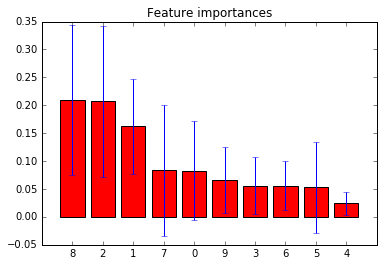

COLD AND POLAR - BINARY CLASSIFICATION
Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.73 (+/- 0.19)
Linear SVM Feature Importance:
Feature ranking:
1. feature 8 - 9A The Velar Nasal (0.190097)
2. feature 7 - 8A Lateral Consonants (0.172819)
3. feature 6 - 7A Glottalized Consonants (0.153454)
4. feature 2 - 3A Consonant-Vowel Ratio (0.142706)
5. feature 0 - 1A Consonant Inventories (0.118804)
6. feature 4 - 13A Tone (0.116170)
7. feature 3 - 4A Voicing in Plosives and Fricatives (0.071374)
8. feature 1 - 2A Vowel Quality Inventories (0.034576)
9. feature 9 - 10A Vowel Nasalization (0.000000)
10. feature 5 - 18A Absence of Common Consonants (0.000000)


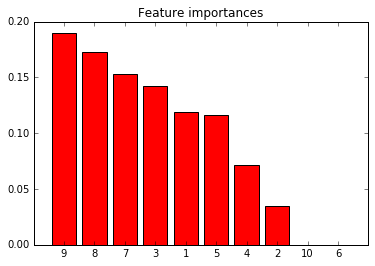

/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)



Random Forest Classification:
[ 0.8  0.8  0.8  0.5  1. ]
Accuracy: 0.78 (+/- 0.32)
Feature ranking:
1. feature 8 - 9A The Velar Nasal (0.198132)
2. feature 0 - 1A Consonant Inventories (0.165652)
3. feature 2 - 3A Consonant-Vowel Ratio (0.160807)
4. feature 7 - 8A Lateral Consonants (0.105649)
5. feature 6 - 7A Glottalized Consonants (0.099371)
6. feature 3 - 4A Voicing in Plosives and Fricatives (0.089456)
7. feature 1 - 2A Vowel Quality Inventories (0.076698)
8. feature 4 - 13A Tone (0.063418)
9. feature 5 - 18A Absence of Common Consonants (0.040816)
10. feature 9 - 10A Vowel Nasalization (0.000000)
[8 0 2 7 6 3 1 4 5 9]


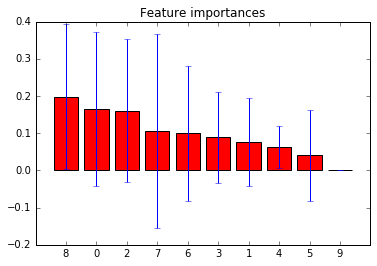


Extra Trees Classification:
[ 0.8  1.   0.6  0.5  1. ]
Accuracy: 0.78 (+/- 0.41)
Feature ranking:
1. feature 8 - 9A The Velar Nasal (0.286385)
2. feature 2 - 3A Consonant-Vowel Ratio (0.214622)
3. feature 5 - 18A Absence of Common Consonants (0.109381)
4. feature 1 - 2A Vowel Quality Inventories (0.097241)
5. feature 4 - 13A Tone (0.082552)
6. feature 7 - 8A Lateral Consonants (0.067176)
7. feature 0 - 1A Consonant Inventories (0.065799)
8. feature 6 - 7A Glottalized Consonants (0.054996)
9. feature 3 - 4A Voicing in Plosives and Fricatives (0.021848)
10. feature 9 - 10A Vowel Nasalization (0.000000)
[8 2 5 1 4 7 0 6 3 9]


/opt/jupyterhub/pyvenv/lib/python3.4/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


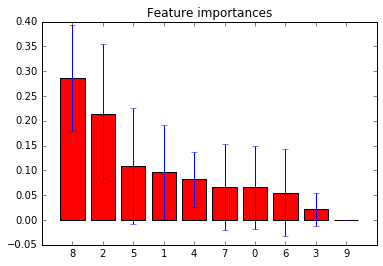

In [440]:
#Phonological - Binary Classifications

#Binary classification for each climate
binary_clas(df1,features,subsets)


Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.55 (+/- 0.27)
Linear SVM Feature Importance:
Feature ranking:
(128, 10)
10
10
1. feature 5 - 18A Absence of Common Consonants (0.275054)
2. feature 7 - 8A Lateral Consonants (0.219866)
3. feature 4 - 13A Tone (0.214727)
4. feature 8 - 9A The Velar Nasal (0.099573)
5. feature 1 - 2A Vowel Quality Inventories (0.078449)
6. feature 3 - 4A Voicing in Plosives and Fricatives (0.057645)
7. feature 9 - 10A Vowel Nasalization (0.021185)
8. feature 6 - 7A Glottalized Consonants (0.012491)
9. feature 2 - 3A Consonant-Vowel Ratio (0.010688)
10. feature 0 - 1A Consonant Inventories (0.010321)


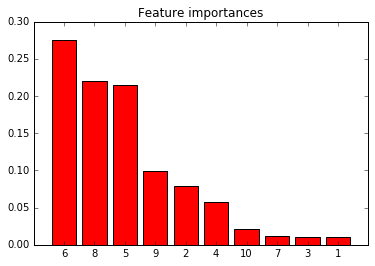


Random Forest Classification:
[ 0.59259259  0.69230769  0.6         0.44        0.72      ]
Accuracy: 0.61 (+/- 0.20)
Feature ranking:
1. feature 7 - 8A Lateral Consonants (0.147612)
2. feature 2 - 3A Consonant-Vowel Ratio (0.133321)
3. feature 3 - 4A Voicing in Plosives and Fricatives (0.131474)
4. feature 0 - 1A Consonant Inventories (0.126937)
5. feature 4 - 13A Tone (0.112962)
6. feature 8 - 9A The Velar Nasal (0.100264)
7. feature 1 - 2A Vowel Quality Inventories (0.075515)
8. feature 5 - 18A Absence of Common Consonants (0.065153)
9. feature 6 - 7A Glottalized Consonants (0.058186)
10. feature 9 - 10A Vowel Nasalization (0.048575)
[7 2 3 0 4 8 1 5 6 9]


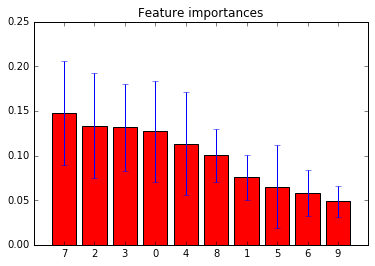


Extra Trees Classification:
[ 0.62962963  0.69230769  0.6         0.6         0.8       ]
Accuracy: 0.66 (+/- 0.15)
Feature ranking:
1. feature 2 - 3A Consonant-Vowel Ratio (0.141811)
2. feature 0 - 1A Consonant Inventories (0.134660)
3. feature 7 - 8A Lateral Consonants (0.120466)
4. feature 4 - 13A Tone (0.105240)
5. feature 3 - 4A Voicing in Plosives and Fricatives (0.100850)
6. feature 1 - 2A Vowel Quality Inventories (0.098786)
7. feature 8 - 9A The Velar Nasal (0.096146)
8. feature 6 - 7A Glottalized Consonants (0.082812)
9. feature 5 - 18A Absence of Common Consonants (0.076262)
10. feature 9 - 10A Vowel Nasalization (0.042967)
[2 0 7 4 3 1 8 6 5 9]


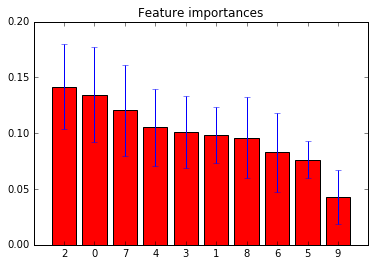

In [479]:
#Binary Group Classification
#Tropical,Arid (F) vs Temperate, Cold, Polar (G)
y_ = trg
for l in range(0,len(y_)):
    if y_[l]=='A' or y_[l]=='B':
        y_[l] = 'F'
    else:
        y_[l] = 'G'
#print(y_)
rf = RandomForestClassifier(class_weight = 'balanced')
sv = svm.SVC(kernel= "linear", class_weight = 'balanced')
et = ExtraTreesClassifier(random_state=0, class_weight = 'balanced')
trained_model = rf.fit(X,y_)
cvsv = cross_val_score(sv, X, y_, cv=5)
t_m = et.fit(X, y_)
print("Linear SVM Classification C-V:")
print(cvs)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvsv.mean(), cvsv.std() * 2))
print("Linear SVM Feature Importance:")
svm_feat_imp(sv, X, trg, features)
cvrf = cross_val_score(rf, X, y_, cv=5)
print()
print("Random Forest Classification:")
print(cvrf)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvrf.mean(), cvrf.std() * 2))
RFC_feat_imp(trained_model, features, X)
print()
print("Extra Trees Classification:")
etcv = cross_val_score(et, X, y_, cv=5)
print(etcv)
print("Accuracy: %0.2f (+/- %0.2f)" % (etcv.mean(), etcv.std() * 2))
RFC_feat_imp(t_m, features, X)


Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.53 (+/- 0.20)
Linear SVM Feature Importance:
Feature ranking:
(128, 10)
10
10
1. feature 9 - 10A Vowel Nasalization (0.204635)
2. feature 5 - 18A Absence of Common Consonants (0.203967)
3. feature 0 - 1A Consonant Inventories (0.154368)
4. feature 2 - 3A Consonant-Vowel Ratio (0.135989)
5. feature 3 - 4A Voicing in Plosives and Fricatives (0.096813)
6. feature 7 - 8A Lateral Consonants (0.085679)
7. feature 6 - 7A Glottalized Consonants (0.065198)
8. feature 8 - 9A The Velar Nasal (0.018380)
9. feature 1 - 2A Vowel Quality Inventories (0.018276)
10. feature 4 - 13A Tone (0.016695)


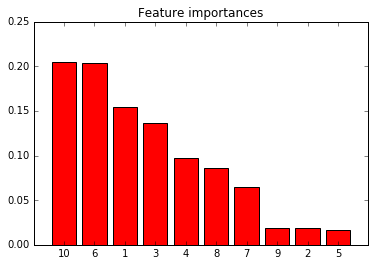


Random Forest Classification:
[ 0.5         0.34615385  0.57692308  0.69230769  0.58333333]
Accuracy: 0.54 (+/- 0.23)
Feature ranking:
1. feature 2 - 3A Consonant-Vowel Ratio (0.150314)
2. feature 0 - 1A Consonant Inventories (0.132213)
3. feature 3 - 4A Voicing in Plosives and Fricatives (0.128550)
4. feature 1 - 2A Vowel Quality Inventories (0.124455)
5. feature 7 - 8A Lateral Consonants (0.114898)
6. feature 4 - 13A Tone (0.112726)
7. feature 6 - 7A Glottalized Consonants (0.083776)
8. feature 8 - 9A The Velar Nasal (0.082486)
9. feature 9 - 10A Vowel Nasalization (0.058099)
10. feature 5 - 18A Absence of Common Consonants (0.012484)
[2 0 3 1 7 4 6 8 9 5]


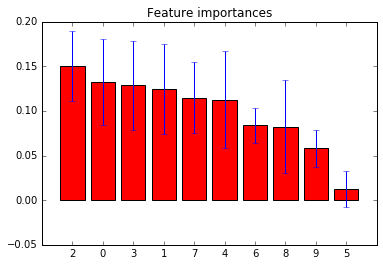


Extra Trees Classification:
[ 0.65384615  0.34615385  0.53846154  0.46153846  0.625     ]
Accuracy: 0.53 (+/- 0.22)
Feature ranking:
1. feature 3 - 4A Voicing in Plosives and Fricatives (0.159408)
2. feature 2 - 3A Consonant-Vowel Ratio (0.130467)
3. feature 0 - 1A Consonant Inventories (0.125080)
4. feature 7 - 8A Lateral Consonants (0.118318)
5. feature 4 - 13A Tone (0.107399)
6. feature 6 - 7A Glottalized Consonants (0.106717)
7. feature 1 - 2A Vowel Quality Inventories (0.096739)
8. feature 8 - 9A The Velar Nasal (0.075085)
9. feature 9 - 10A Vowel Nasalization (0.051080)
10. feature 5 - 18A Absence of Common Consonants (0.029708)
[3 2 0 7 4 6 1 8 9 5]


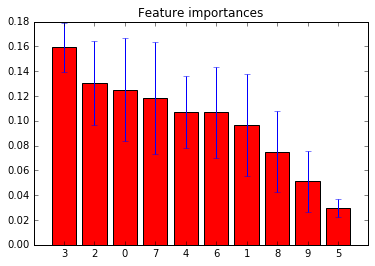

In [487]:
#Binary Group Classification
#Arid,Cold,Polar(H) vs Tropical,Temperate(I)
y_ = trg
for l in range(0,len(y_)):
    if y_[l]=='A' or y_[l]=='C':
        y_[l] = 'H'
    else:
        y_[l] = 'I'
#print(y_)
rf = RandomForestClassifier(class_weight = 'balanced')
sv = svm.SVC(kernel= "linear", class_weight = 'balanced')
et = ExtraTreesClassifier(random_state=0, class_weight = 'balanced')
trained_model = rf.fit(X,y_)
cvsv = cross_val_score(sv, X, y_, cv=5)
t_m = et.fit(X, y_)
print("Linear SVM Classification C-V:")
print(cvs)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvsv.mean(), cvsv.std() * 2))
print("Linear SVM Feature Importance:")
svm_feat_imp(sv, X, trg, features)
cvrf = cross_val_score(rf, X, y_, cv=5)
print()
print("Random Forest Classification:")
print(cvrf)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvrf.mean(), cvrf.std() * 2))
RFC_feat_imp(trained_model, features, X)
print()
print("Extra Trees Classification:")
etcv = cross_val_score(et, X, y_, cv=5)
print(etcv)
print("Accuracy: %0.2f (+/- %0.2f)" % (etcv.mean(), etcv.std() * 2))
RFC_feat_imp(t_m, features, X)


Linear SVM Classification C-V:
[ 0.75    0.5625  0.6875  0.375   0.8   ]
Accuracy: 0.37 (+/- 0.17)
Linear SVM Feature Importance:
Feature ranking:
(128, 10)
10
10
1. feature 1 - 2A Vowel Quality Inventories (0.386799)
2. feature 5 - 18A Absence of Common Consonants (0.230787)
3. feature 3 - 4A Voicing in Plosives and Fricatives (0.096658)
4. feature 2 - 3A Consonant-Vowel Ratio (0.083150)
5. feature 0 - 1A Consonant Inventories (0.069604)
6. feature 9 - 10A Vowel Nasalization (0.051940)
7. feature 4 - 13A Tone (0.042836)
8. feature 6 - 7A Glottalized Consonants (0.029343)
9. feature 8 - 9A The Velar Nasal (0.006577)
10. feature 7 - 8A Lateral Consonants (0.002306)


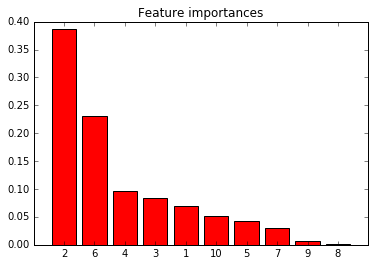


Random Forest Classification:
[ 0.66666667  0.57692308  0.48        0.52        0.56      ]
Accuracy: 0.56 (+/- 0.13)
Feature ranking:
1. feature 0 - 1A Consonant Inventories (0.166430)
2. feature 2 - 3A Consonant-Vowel Ratio (0.150618)
3. feature 3 - 4A Voicing in Plosives and Fricatives (0.150228)
4. feature 4 - 13A Tone (0.099617)
5. feature 7 - 8A Lateral Consonants (0.098142)
6. feature 1 - 2A Vowel Quality Inventories (0.093309)
7. feature 6 - 7A Glottalized Consonants (0.086550)
8. feature 8 - 9A The Velar Nasal (0.074711)
9. feature 9 - 10A Vowel Nasalization (0.051491)
10. feature 5 - 18A Absence of Common Consonants (0.028906)
[0 2 3 4 7 1 6 8 9 5]


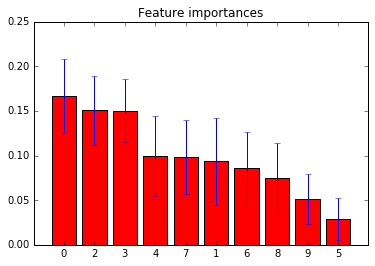


Extra Trees Classification:
[ 0.7037037   0.53846154  0.44        0.36        0.48      ]
Accuracy: 0.50 (+/- 0.23)
Feature ranking:
1. feature 0 - 1A Consonant Inventories (0.159650)
2. feature 2 - 3A Consonant-Vowel Ratio (0.137665)
3. feature 4 - 13A Tone (0.126618)
4. feature 1 - 2A Vowel Quality Inventories (0.116255)
5. feature 7 - 8A Lateral Consonants (0.112458)
6. feature 3 - 4A Voicing in Plosives and Fricatives (0.104400)
7. feature 8 - 9A The Velar Nasal (0.082174)
8. feature 6 - 7A Glottalized Consonants (0.073802)
9. feature 9 - 10A Vowel Nasalization (0.052257)
10. feature 5 - 18A Absence of Common Consonants (0.034721)
[0 2 4 1 7 3 8 6 9 5]


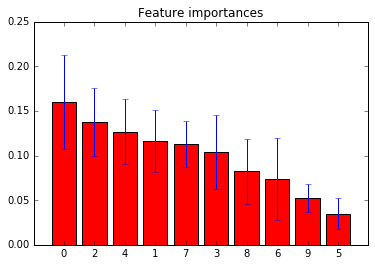

In [490]:
#Binary Group Classification
#Arid,Temperate(J) vs Tropical,Cold,Polar(K)
y_ = trg
for l in range(0,len(y_)):
    if y_[l]=='B' or y_[l]=='C':
        y_[l] = 'J'
    else:
        y_[l] = 'K'

rf = RandomForestClassifier(class_weight = 'balanced')
sv = svm.SVC(kernel= "linear", class_weight = 'balanced')
et = ExtraTreesClassifier(random_state=0, class_weight = 'balanced')
trained_model = rf.fit(X,y_)
cvsv = cross_val_score(sv, X, y_, cv=5)
t_m = et.fit(X, y_)
print("Linear SVM Classification C-V:")
print(cvs)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvsv.mean(), cvsv.std() * 2))
print("Linear SVM Feature Importance:")
svm_feat_imp(sv, X, trg, features)
cvrf = cross_val_score(rf, X, y_, cv=5)
print()
print("Random Forest Classification:")
print(cvrf)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvrf.mean(), cvrf.std() * 2))
RFC_feat_imp(trained_model, features, X)
print()
print("Extra Trees Classification:")
etcv = cross_val_score(et, X, y_, cv=5)
print(etcv)
print("Accuracy: %0.2f (+/- %0.2f)" % (etcv.mean(), etcv.std() * 2))
RFC_feat_imp(t_m, features, X)

In [445]:
#PREPROCCESSING FOR MORPHOLOGY
#Same classification procedure for 8 Morphology Features - 23A, 24A, 25A, 25B, 26A, 27A, 28A, 29A

df2 = lang_df[lang_df['23A Locus of Marking in the Clause'].notnull() & lang_df['24A Locus of Marking in Possessive Noun Phrases'].notnull() & lang_df['25A Locus of Marking: Whole-language Typology'].notnull() & lang_df['25B Zero Marking of A and P Arguments'].notnull()& lang_df['26A Prefixing vs. Suffixing in Inflectional Morphology'].notnull() 
& lang_df['27A Reduplication'].notnull() & lang_df['28A Case Syncretism'].notnull() & lang_df['29A Syncretism in Verbal Person/Number Marking'].notnull()]

ft = ['23A Locus of Marking in the Clause','24A Locus of Marking in Possessive Noun Phrases','25A Locus of Marking: Whole-language Typology','25B Zero Marking of A and P Arguments','26A Prefixing vs. Suffixing in Inflectional Morphology', '27A Reduplication', '28A Case Syncretism', '29A Syncretism in Verbal Person/Number Marking']
#pre-proccesing
#F,P = df_list(df2,ft)
Cl= pd.Series.tolist(df2['Climate'])
stats_out(Cl)
print(len(Cl))




A - Tropical: 29
B - Arid: 18
C - Temperate: 29
D - Cold: 12
E - Polar: 3
91


In [227]:
#One v Rest SVM linear classifier and Cross-Validation with OHE for Climate 
classify = OneVsRestClassifier(estimator=SVC(random_state=0))

predic = classify.fit(F, P).predict(F)


In [228]:
y_actu = pd.Series(P, name='Actual')
y_pred = pd.Series(predic, name='Predicted')
confusion = pd.crosstab(y_actu, y_pred)
confusion

Predicted,1,2,3,4,5
Actual,,,,,
1,26,1,2,0,0
2,4,11,3,0,0
3,5,1,23,0,0
4,2,1,3,6,0
5,0,0,0,0,3


In [229]:
#Simple accuracy of SVM
c=0
for i in range(0, len(P)):
    if P[i]== predic[i]:
        c=c+1
c/len(P)


0.7582417582417582

In [496]:
#Random Forest for Morphology



In [ ]:
predictions = trained_mod.predict(test_f)
print("Train Accuracy :: ", accuracy_score(train_p, trained_mod.predict(train_f)))
print("Test Accuracy  :: ", accuracy_score(test_p, predictions))

In [ ]:
#Feature Importance
importances = trained_mod.feature_importances_
std = np.std([tree.feature_importances_ for tree in trained_mod.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

F = np.asarray(F)

for f in range(F.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f] , features[indices[f]], importances[indices[f]]))
    
print(indices)
plt.figure()
plt.title("Feature importances")
plt.bar(range(F.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(F.shape[1]), indices)
plt.xlim([-1, F.shape[1]])
plt.show()

In [491]:
binary_clas(df2, ft, subsets)